In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import trapz #we will need it in order to calculate AUC
from sklearn import metrics #we will need it to automatically calculate fpr, tpr, thresholds

In [2]:
#Read initial data; considering the separator is tab
data = pd.read_csv("lab2_data.csv", sep="\t") 

In [3]:
#as type(data["churn"]) is some pandas class, we need to convert it to numbers
churn = pd.to_numeric(data["churn"])

In [4]:
#The same stuff with churn_pred_prob
churn_prob = pd.to_numeric(data["churn_pred_prob"].str.replace(",",".")) 

In [5]:
#array with a lot of tresholds values
thresholds = np.arange(0., 1., 0.001)

In [6]:
tprs = np.array([])
fprs = np.array([])

for threshold in thresholds:
    tprs = np.append(tprs, (churn[churn_prob > threshold] == 1).astype(int).sum()/len(churn[churn == 1]))
    fprs = np.append(fprs, (churn[churn_prob > threshold] == 0).astype(int).sum()/len(churn[churn == 0]))

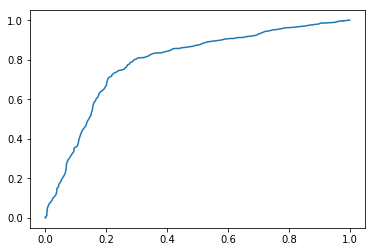

In [7]:
#Plot our graph
plt.plot(fprs, tprs)

In [8]:
abs(trapz(tprs, fprs))

0.787281402032421

In [9]:
fpr, tpr, thresholds = metrics.roc_curve(churn, churn_prob)
metrics.auc(fpr, tpr)

0.787281402032421